# Import Data

In [123]:
import numpy as np
import pandas as pd
import string

import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime 

from sklearn.model_selection import train_test_split
%matplotlib inline

### *What is the dataset, Library Collection Inventory?*
##### This dataset includes monthly snapshot of all of the physical items in the Seattle Public Library’s collection. Consistent monthly data begins with a snapshot taken August 1, 2016, continuing to the present. Additionally, this dataset contains snapshots taken on: January 1 in the years 2012, 2013, 2014, and 2016.

### *Dataset Columns*

###### Subjects : Subject authroity records associated with the title, including Motion Pictures, Computer Programming, etc... Typiclaly these are highly specific

   ###### Item type : a code from the catalog record that describes the type of item. There are a total of 21 item types. Most commonly reported item types include: 
   ###### **acbk (adult book), accd (adult CD), jcbk (children's book)**
 

###### PublicationYear : The PublicationYear field includes the year from the catalog record in which the item was published, printed, or copyrighted as recorded in the Horizon bibliographic record.

###### This column is formatted as follows: 
   ###### 2005—publication date
   ###### c. 2005 – copyright symbol
   ###### [2005] – Printing date
   ###### p. 2005 – phonogram copyright symbol
   ###### 2004, c. 2005 – publication and copyright date
   ###### 2005-2007 – intervening years 
   ###### [2005?] – Approximate date

###### Reprot Date : The date when this item count was collected from the ILS (Horizon).

###### ItemCount : The number of items in this location, collection, item type, and item status as of the report date.


In [124]:
import timeit
start_time = timeit.default_timer()
# code you want to evaluate


In [125]:
nRowsRead = 'none' # specify 'None' if want to read whole file nrows = nRowsRead, 
data = pd.read_csv("Library_Collection_Inventory.csv", usecols = ['Title','ReportDate', 'ItemCount', 'PublicationYear', 'Publisher', 'ItemType','Author'],  keep_default_na = True)
data.dataframeName= 'library-collecion-inventory'
nRow, nCol = data.shape
data.tail(5)


,Title,Author,PublicationYear,Publisher,ItemType,ReportDate,ItemCount
2515775,1607 : a new look at Jamestown / by Karen E. L...,"Lange, Karen E.",2007.,"National Geographic,",jcbk,10/01/2017,2.0
2515776,Freedom walkers : the story of the Montgomery ...,"Freedman, Russell",c2006.,"Holiday House,",NaN,NaN,NaN
2515777,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2515778,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2515779,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Identifying Missing Data, and Tidying Up Data:

##### Here is the missing data for each of the columns we are concerned about. 'Author' values missing being the most 15.75 % of the total data. Followed by publication year & Publisher. In this case it would not make sense to fill in missing data as the missing values are specific to the item types, and so on... 

In [126]:
missing_values = data.isnull().sum() / len(data)
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)

missing_values = missing_values.to_frame()
missing_values = missing_values.reset_index()
missing_values.columns = ['Column', 'NA values']

missing_values

,Column,NA values
0,ItemType,0.000002
1,ReportDate,0.000002
2,ItemCount,0.000002
3,Title,0.005180
4,PublicationYear,0.012176
5,Publisher,0.013186
6,Author,0.157566


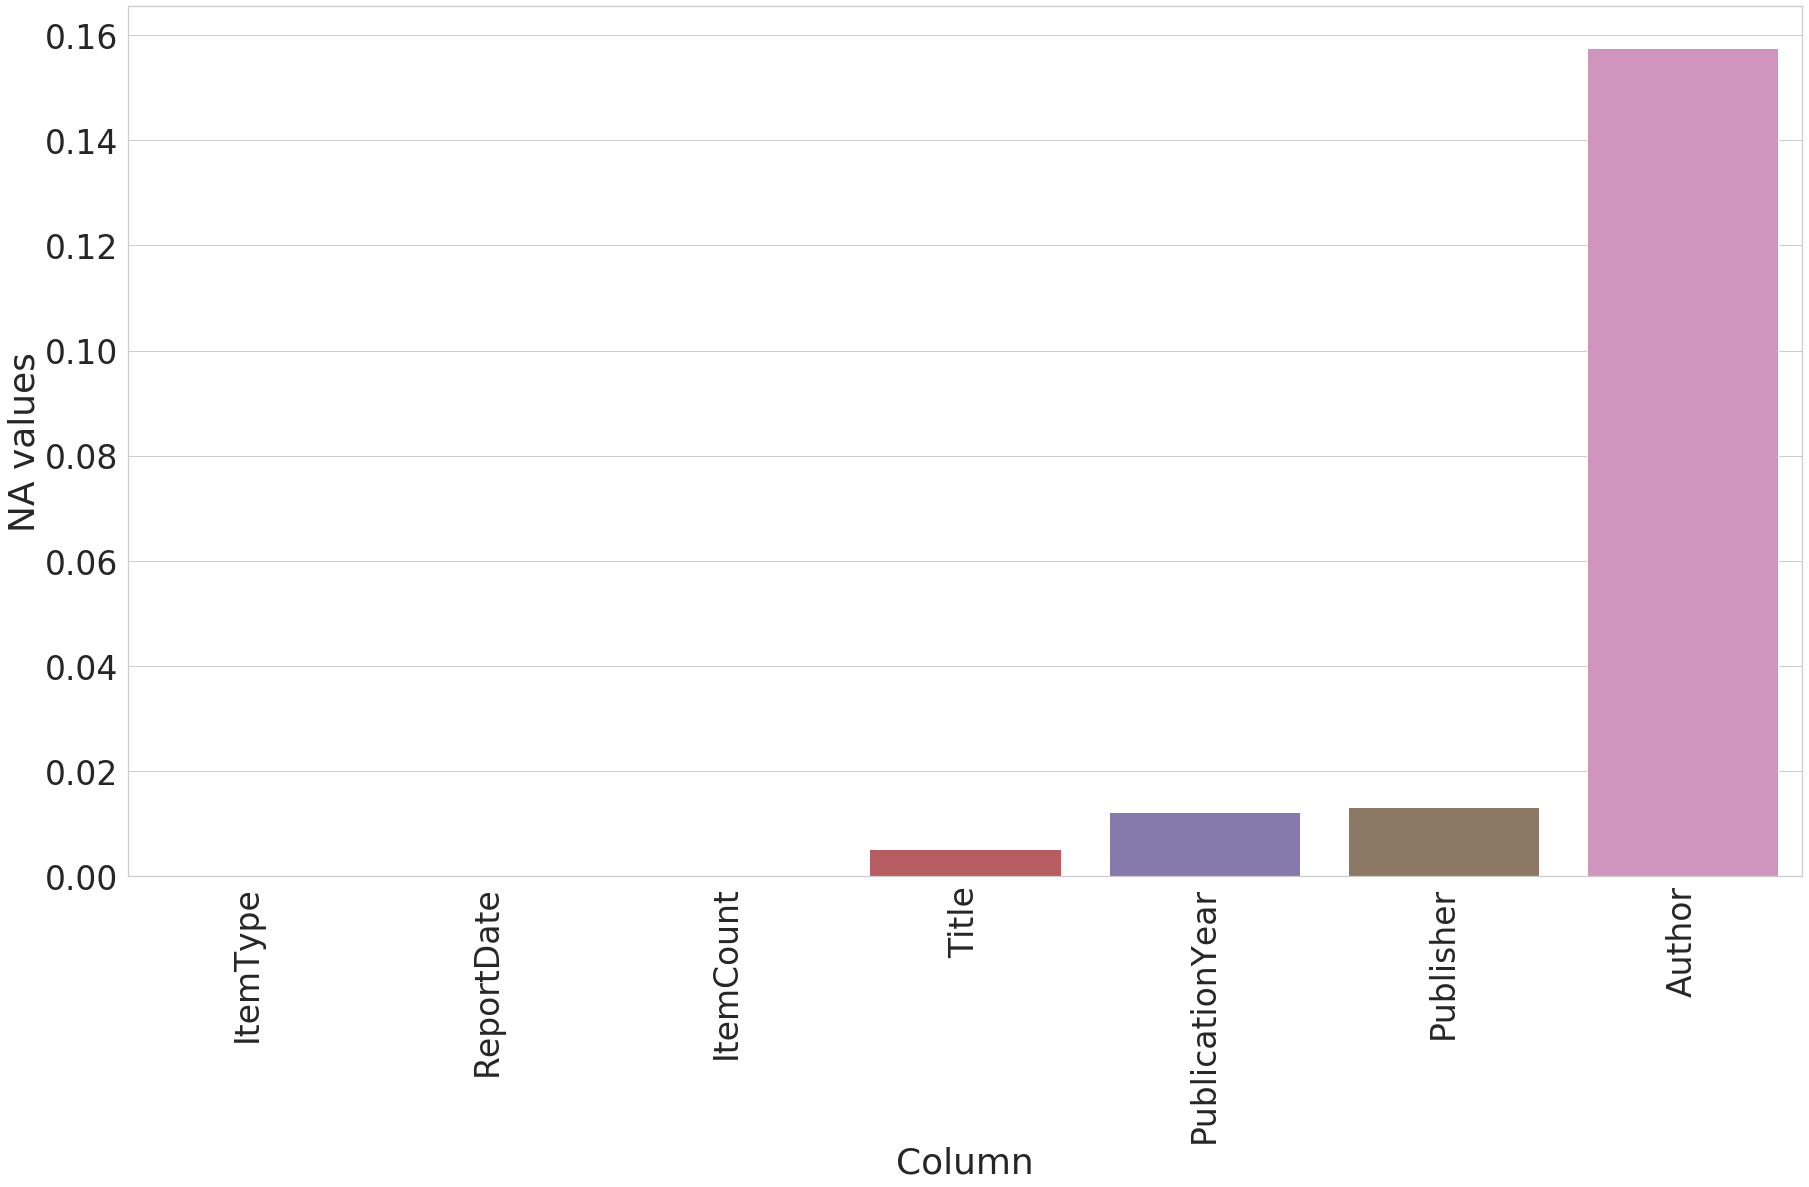

In [154]:
sns.set(style="whitegrid", color_codes=True,font_scale=3 )
sns.barplot(x = 'Column', y = 'NA values', data=missing_values)
plt.xticks(rotation = 90)
plt.show()

#### Categorize Items - Identify Trends

In [128]:
ItemCategories = data['ItemType'].value_counts(ascending=True)
ItemCategories = pd.DataFrame(ItemCategories[-30:]).reset_index()
ItemCategories.columns = ["ItemType", "ItemCount"]
ItemCategories

,ItemType,ItemCount
0,jcmus,56
1,ucfold,92
2,arvhs,94
3,acper,105
4,arcdrom,106
5,accas,108
6,armfm,109
7,bccd,125
8,arcd,154
9,accdrom,170


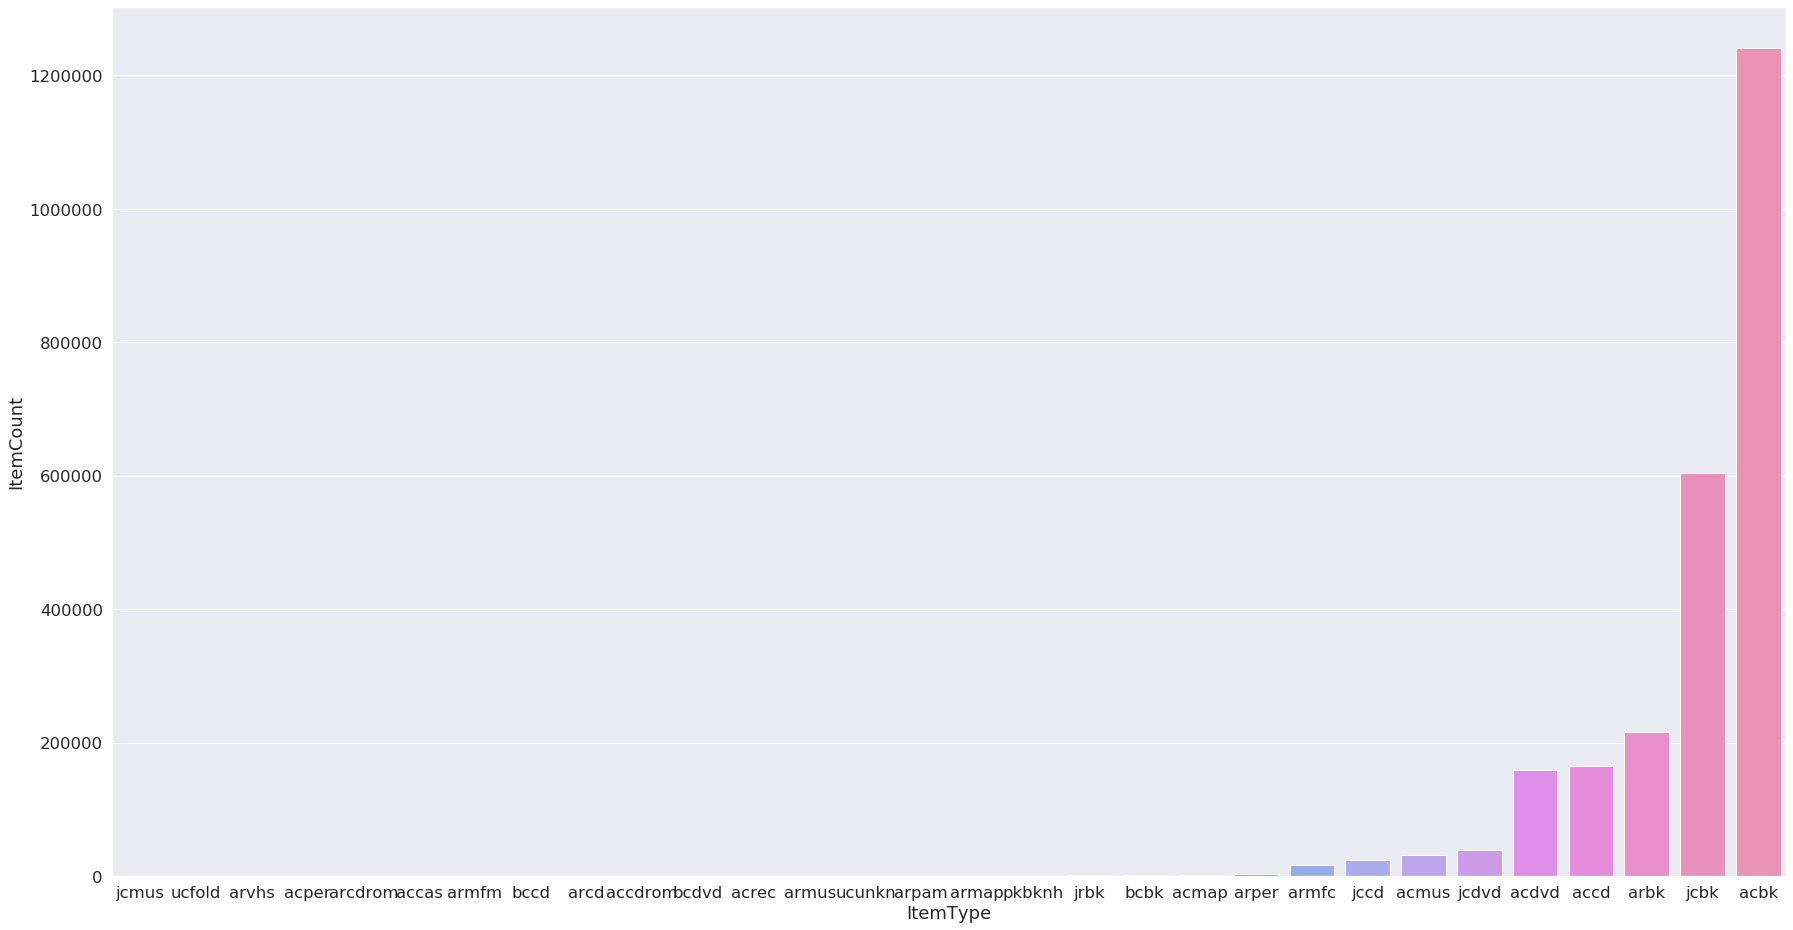

In [129]:
sns.set(rc={'figure.figsize':(30,16)}, font_scale=1.5)
sns.barplot(x='ItemType',y='ItemCount', data=ItemCategories)

In [130]:
ItemCategoriesBig = data['ItemType'].value_counts(ascending=True)
ItemCategoriesBig = pd.DataFrame(ItemCategoriesBig[-9:]).reset_index()
ItemCategoriesBig.columns = ["ItemType", "ItemCount"]
ItemCategoriesBig

,ItemType,ItemCount
0,armfc,17058
1,jccd,24722
2,acmus,32098
3,jcdvd,39076
4,acdvd,159146
5,accd,165711
6,arbk,216141
7,jcbk,604948
8,acbk,1241066


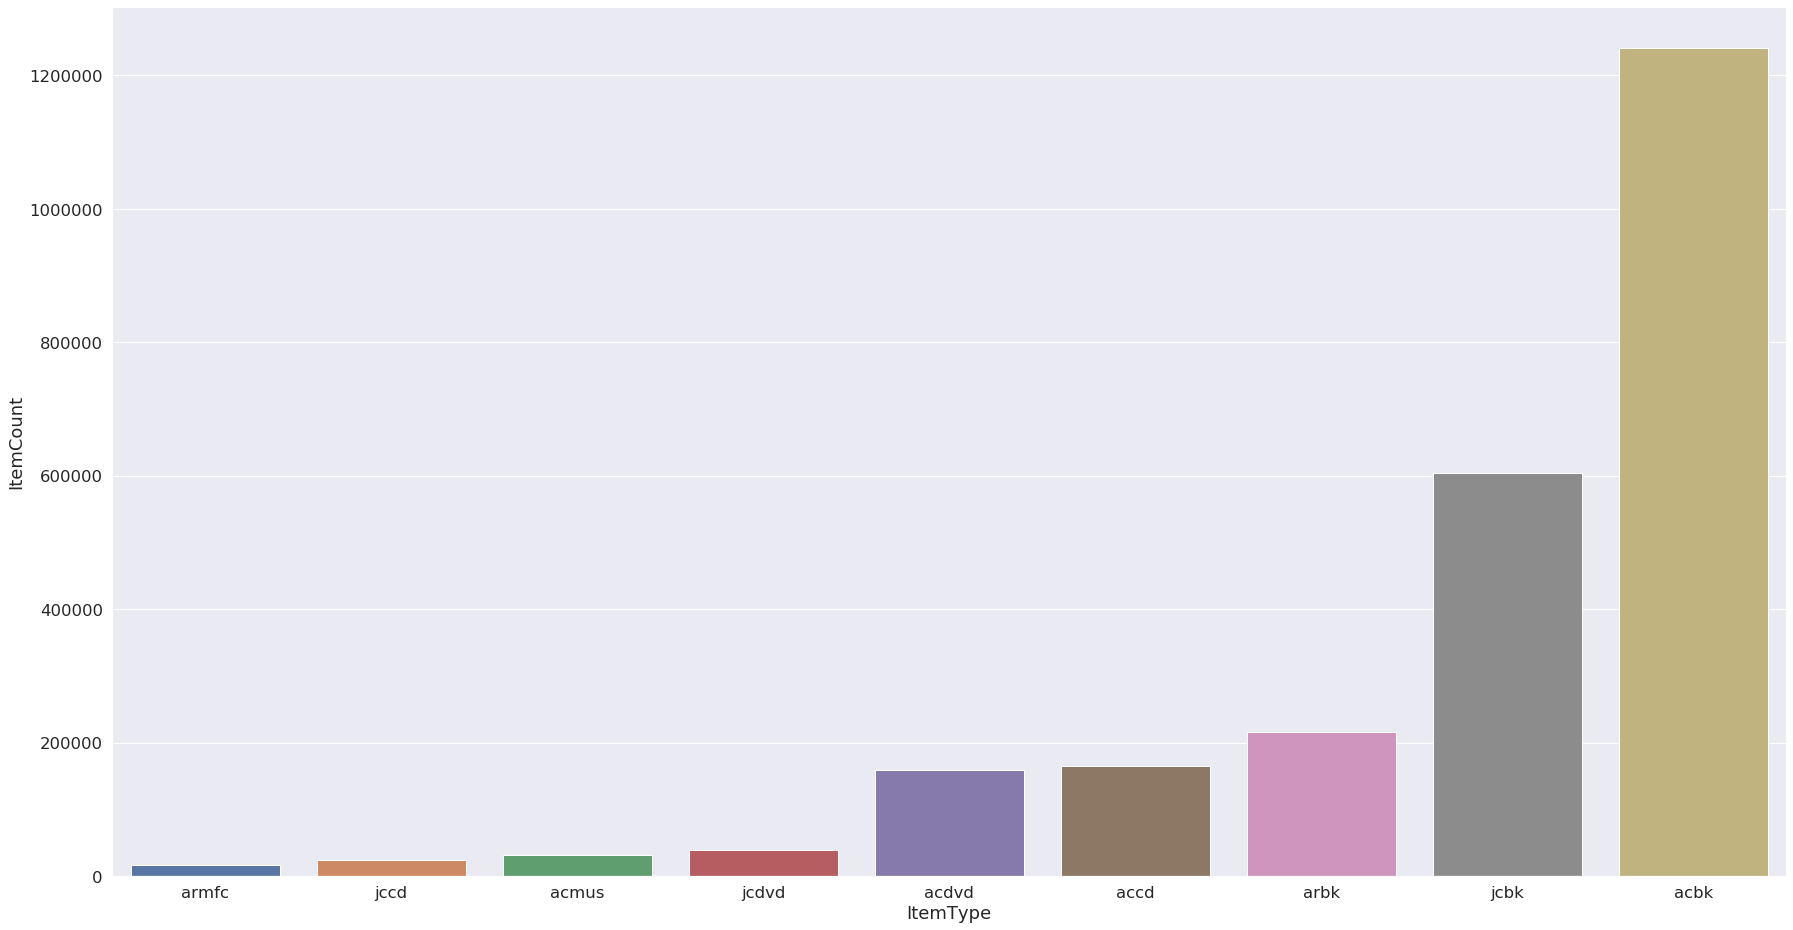

In [131]:
sns.set(rc={'figure.figsize':(30,16)}, font_scale=1.5)
sns.barplot(x='ItemType',y='ItemCount', data=ItemCategoriesBig)

In [132]:
publishers = data['Publisher'].value_counts(ascending=True)

In [133]:
top_10_publishers = pd.DataFrame(publishers[-10:]).reset_index()
top_10_publishers.columns = ["Publisher", "Publications"]
top_10_publishers

,Publisher,Publications
0,"St. Martin's Press,",13055
1,"Viking,",13301
2,"Harper,",13799
3,"Little, Brown and Company,",14326
4,"Simon & Schuster,",14542
5,"Houghton Mifflin Harcourt,",17047
6,"Thorndike Press,",18892
7,"Candlewick Press,",19506
8,"Alfred A. Knopf,",19536
9,"Random House,",32541


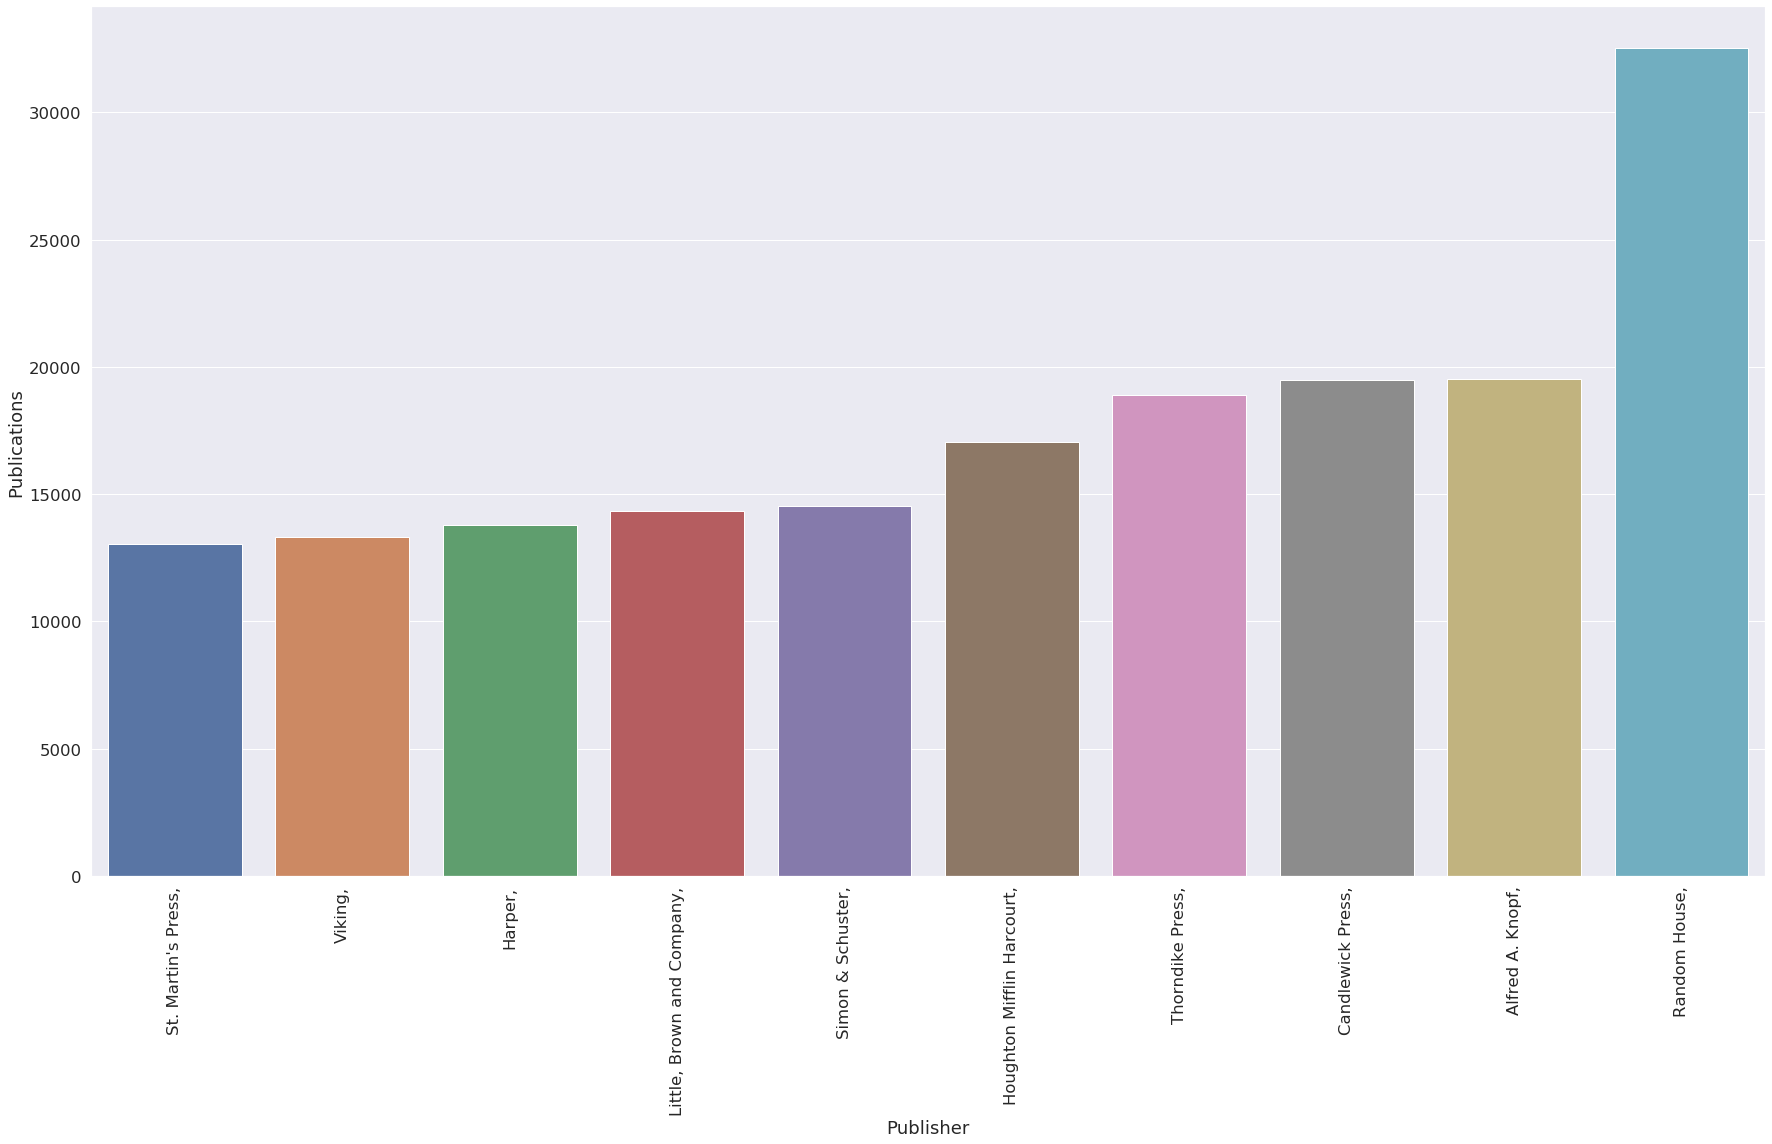

In [134]:
sns.set(rc={'figure.figsize':(30,16)}, font_scale=1.5)
sns.barplot(x='Publisher',y='Publications', data=top_10_publishers)
plt.xticks(rotation = 90)
plt.show()

How is amount of publications distributed between publishers? Is this distribution normal?

/home/kgeme002/.local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/opt/conda/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/conda/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning:

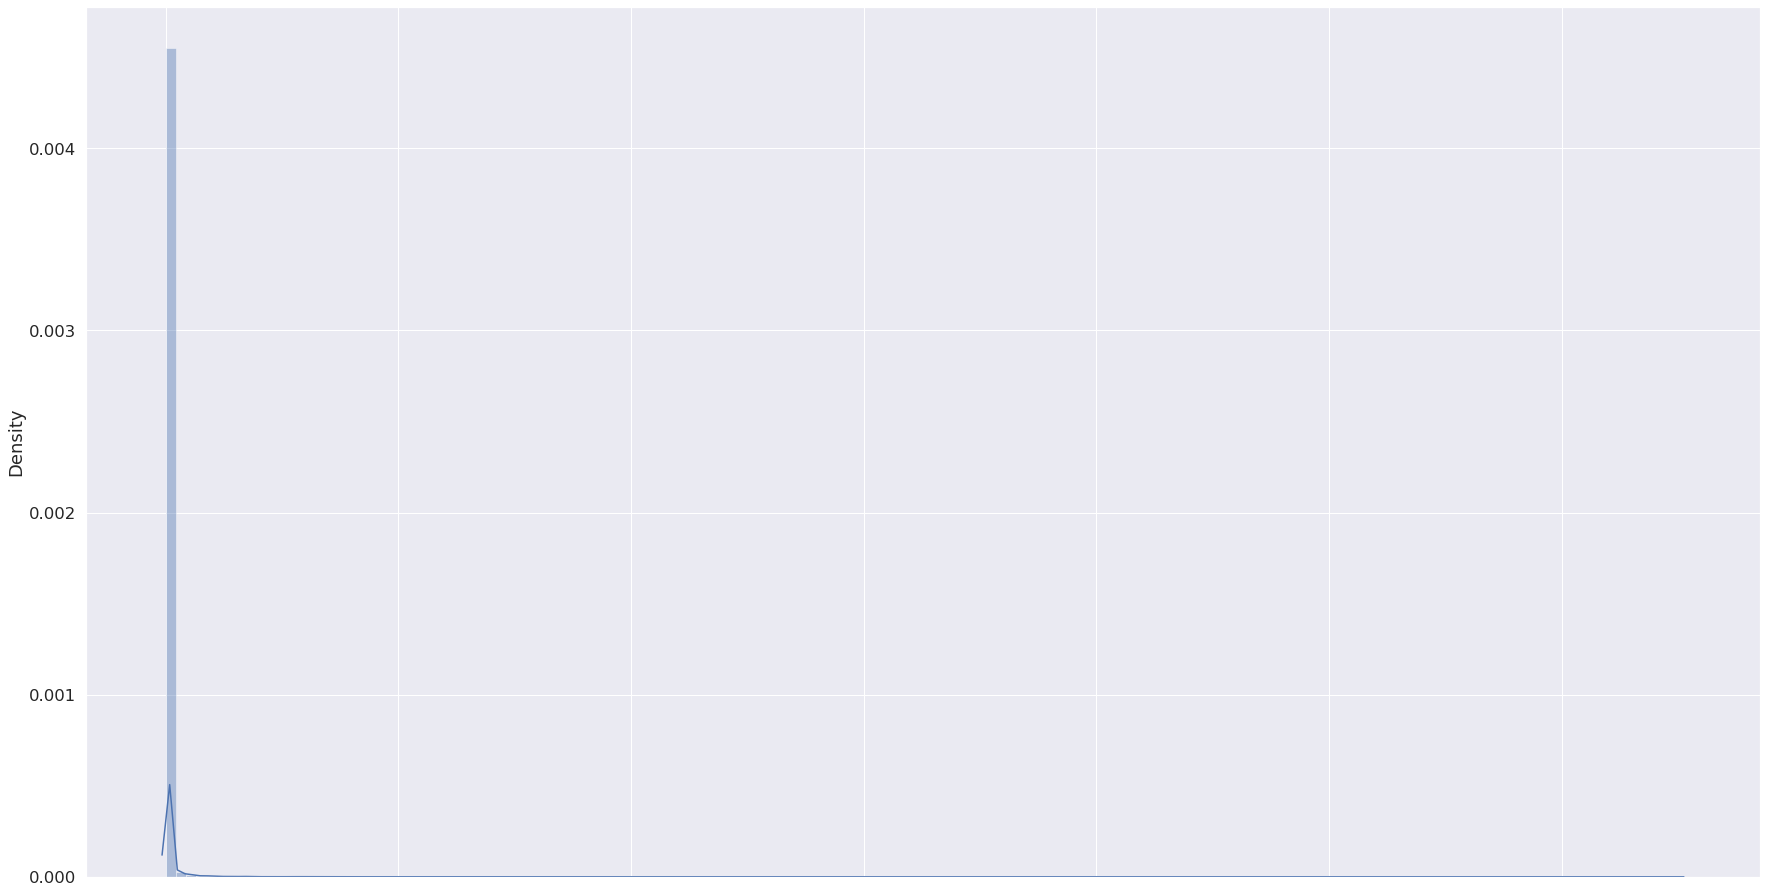

In [135]:
publishers_arranged = pd.DataFrame(publishers).reset_index()
publishers_arranged.columns = ["Publisher", "Publications"]
sns.set(rc={'figure.figsize':(30,16)}, font_scale=1.5)
p = sns.distplot(publishers_arranged, x=publishers_arranged["Publications"], bins = 150)
p.set(xticklabels=[])
p

##### There are a lot of publishers with few titles. Those who had 10 titles or less were removed.

/home/kgeme002/.local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/opt/conda/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/conda/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning:

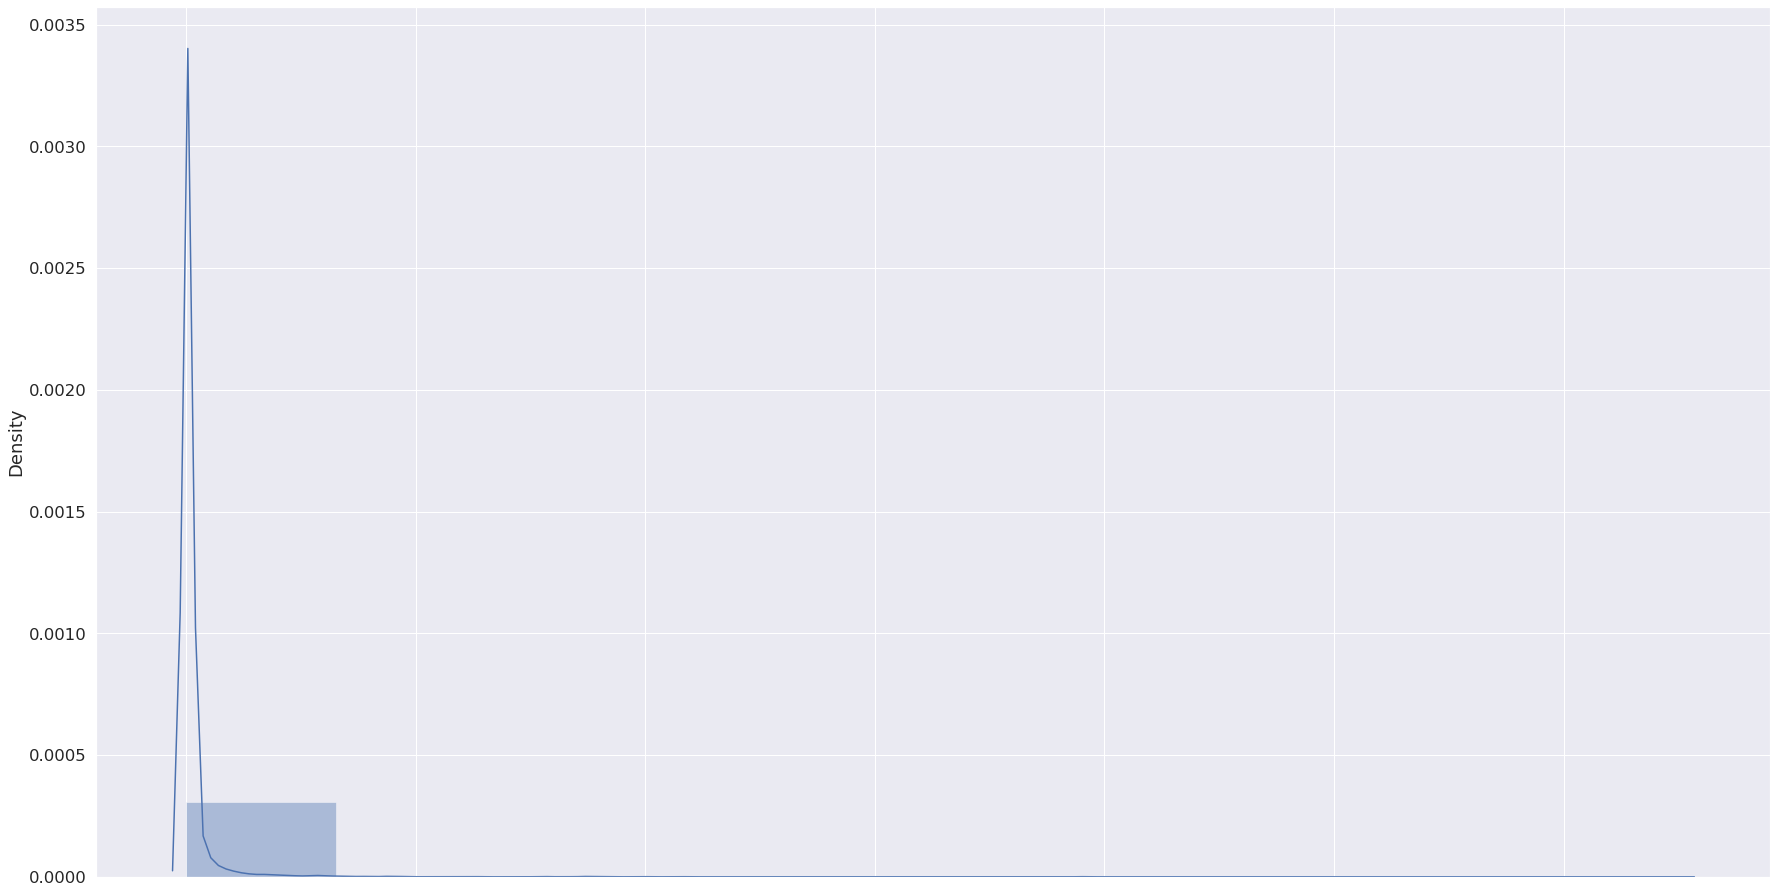

In [136]:
publishers_arranged = pd.DataFrame(publishers).reset_index()
publishers_arranged.columns = ["Publisher", "Publications"]
publishers_active = publishers_arranged[publishers_arranged["Publications"] > 10]
sns.set(rc={'figure.figsize':(30,16)}, font_scale=1.5)
p = sns.distplot(publishers_arranged, x=publishers_active["Publications"], bins = 10)
p.set(xticklabels=[])
p

#### Trend for publishing industry was developing through years.

In [137]:
publications_by_year = data['PublicationYear'].value_counts()
publications_by_year = pd.DataFrame(publications_by_year).reset_index()
publications_by_year.columns = ["Year", "Publications"]
publications_by_year.head()

,Year,Publications
0,[2016],133397
1,[2015],113733
2,2016.,109081
3,[2017],98643
4,2015.,92396


Will need to perform some data clearing

In [138]:
data['PublicationYearNumeric'] = data['PublicationYear'].str.replace("[^0-9]",'') # removing everything that is non-numeric
data['PublicationYearNumeric'] = pd.to_numeric(data['PublicationYear'], errors='coerce') # convert data to numeric values

In [139]:
publications_by_year = data['PublicationYearNumeric'].value_counts()
publications_by_year = pd.DataFrame(publications_by_year).reset_index()
publications_by_year.columns = ["Year", "Publications"]
publications_by_year.head()

,Year,Publications
0,2016.0,110437
1,2015.0,93613
2,2014.0,77477
3,2017.0,73801
4,2013.0,72864


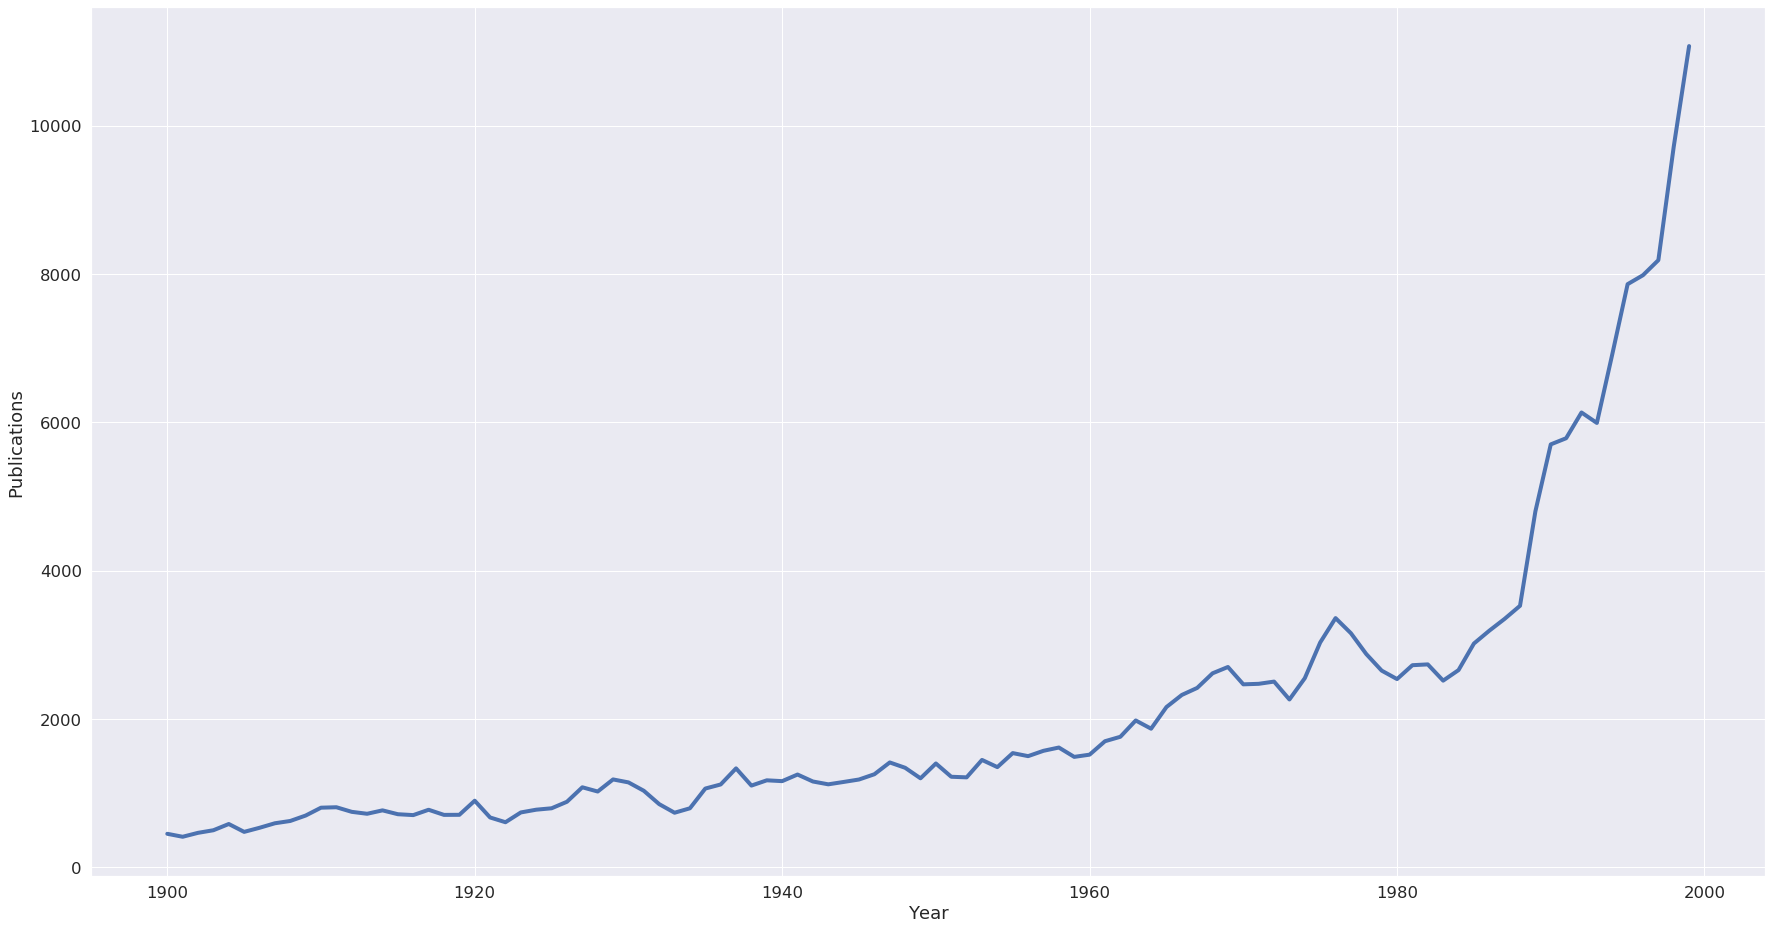

In [140]:
publications_by_year_1990_2000 = publications_by_year[(publications_by_year["Year"] >= 1900) & (publications_by_year["Year"] < 2000)]

sns.set(rc={'figure.figsize':(30,16)}, font_scale=1.5)
p = sns.lineplot(x = "Year", y = "Publications", data = publications_by_year_1990_2000, linewidth = 4)

##### Will also need to filter out publication year. Let's say, limit it to XX century.

In [141]:
publications_by_year_1900_2000 = publications_by_year[(publications_by_year['Year'] >= 1900) & (publications_by_year['Year'] < 2000)]

## sns.set(rc={'figure.figsize':(30,16)}, font_scale=1.5)
p = sns.lineplot(x = "Year", y = "Publications", data = publications_by_year_1900_2000, linewidth = 4)

In [142]:
publications_by_year = data.groupby(['PublicationYearNumeric', 'ItemType']).size()
publications_by_year = publications_by_year.reset_index()

publications_by_year.columns = ['Year', 'ItemType', 'Count']
publications_by_year = publications_by_year[(publications_by_year['Year'] >= 1900) & (publications_by_year['Year'] < 2000)]

/home/kgeme002/.local/lib/python3.7/site-packages/seaborn/distributions.py:385: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


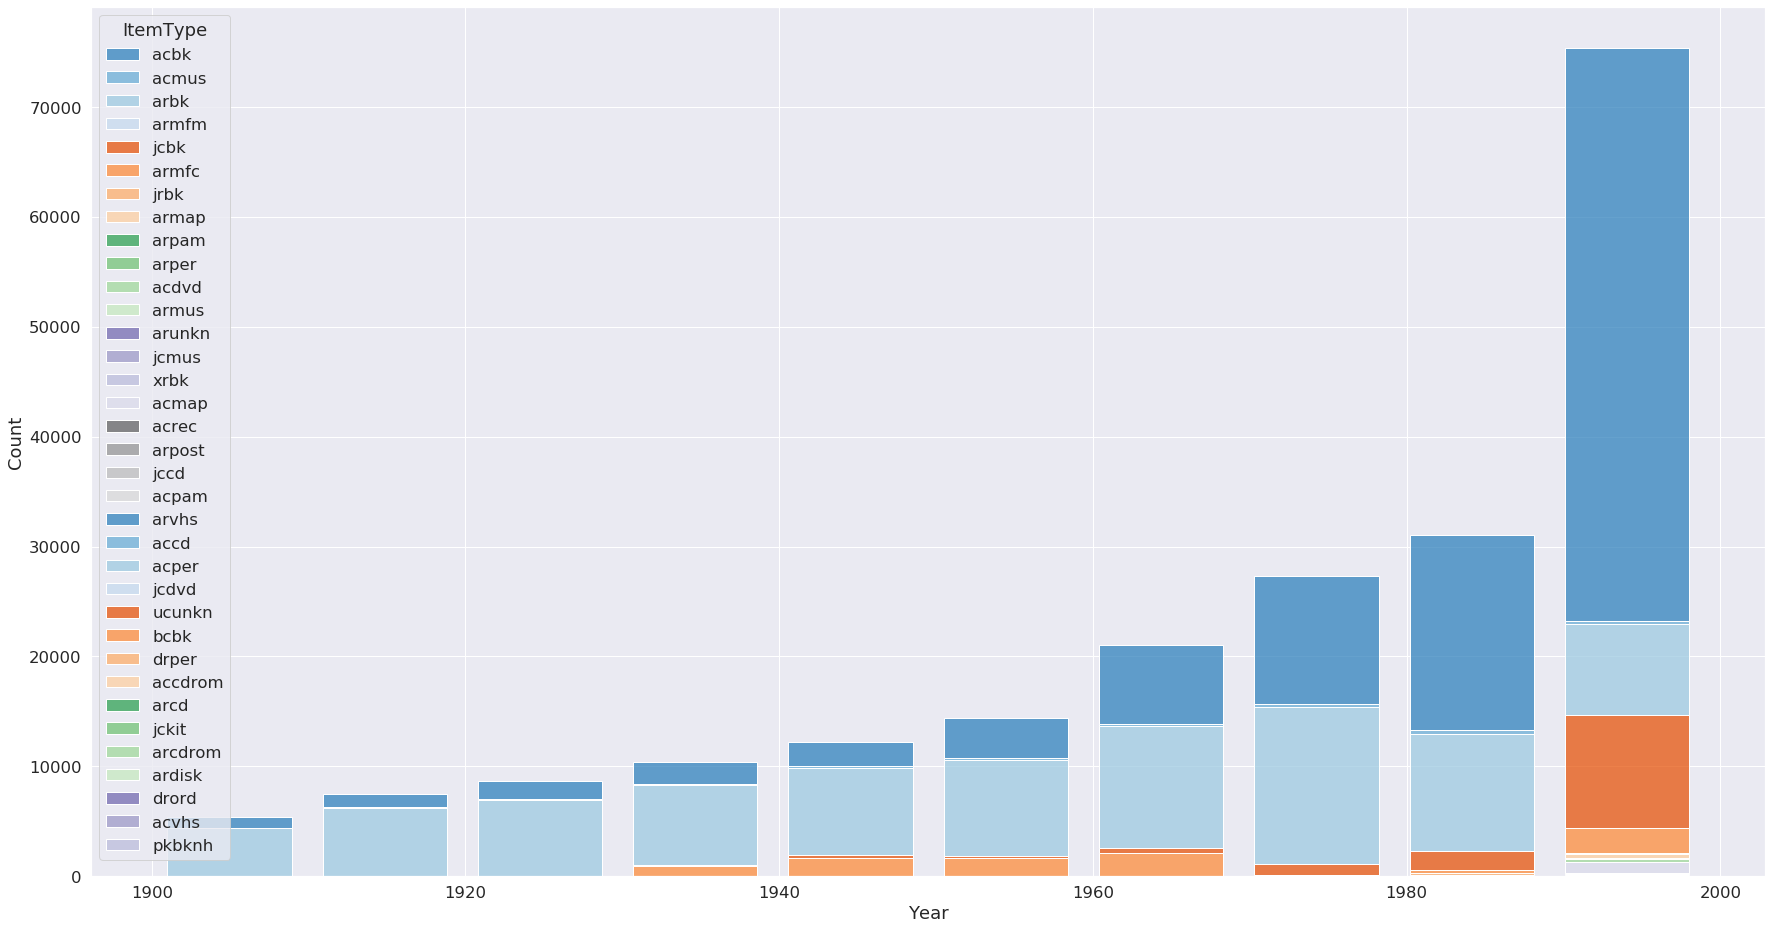

In [143]:
ax = sns.histplot(publications_by_year, x='Year', hue='ItemType', weights='Count',
             multiple='stack', palette='tab20c', shrink=0.8)

In [144]:
ItemCategories = data['ItemType'].value_counts(ascending=True)

In [145]:
ItemCategories = pd.DataFrame(ItemCategories[-5:]).reset_index()
ItemCategories.columns = ["ItemType", "ItemCount"]

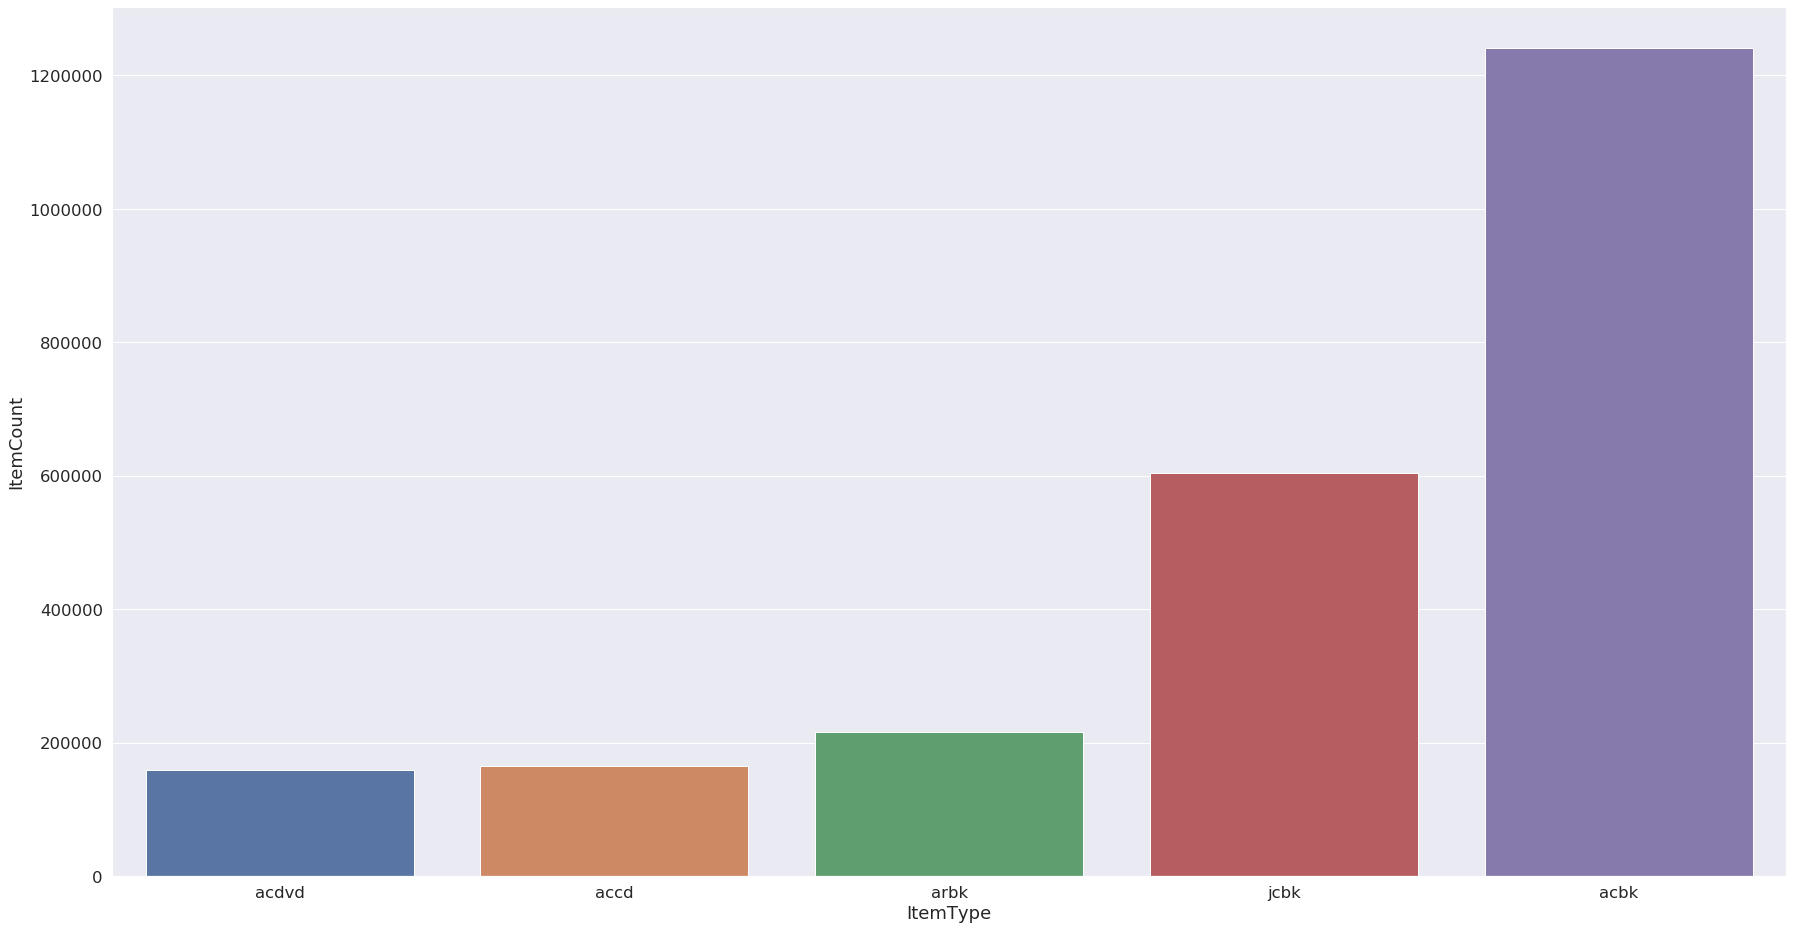

In [146]:
sns.set(rc={'figure.figsize':(30,16)}, font_scale=1.5)
sns.barplot(x='ItemType',y='ItemCount', data=ItemCategories)


### Selecting Data for Training & Testing

Can we fit a linear model to predict publications in given year?

### use mean squred error to determine how far away your predicition was from the mean abs value 

/opt/conda/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/opt/conda/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/conda/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


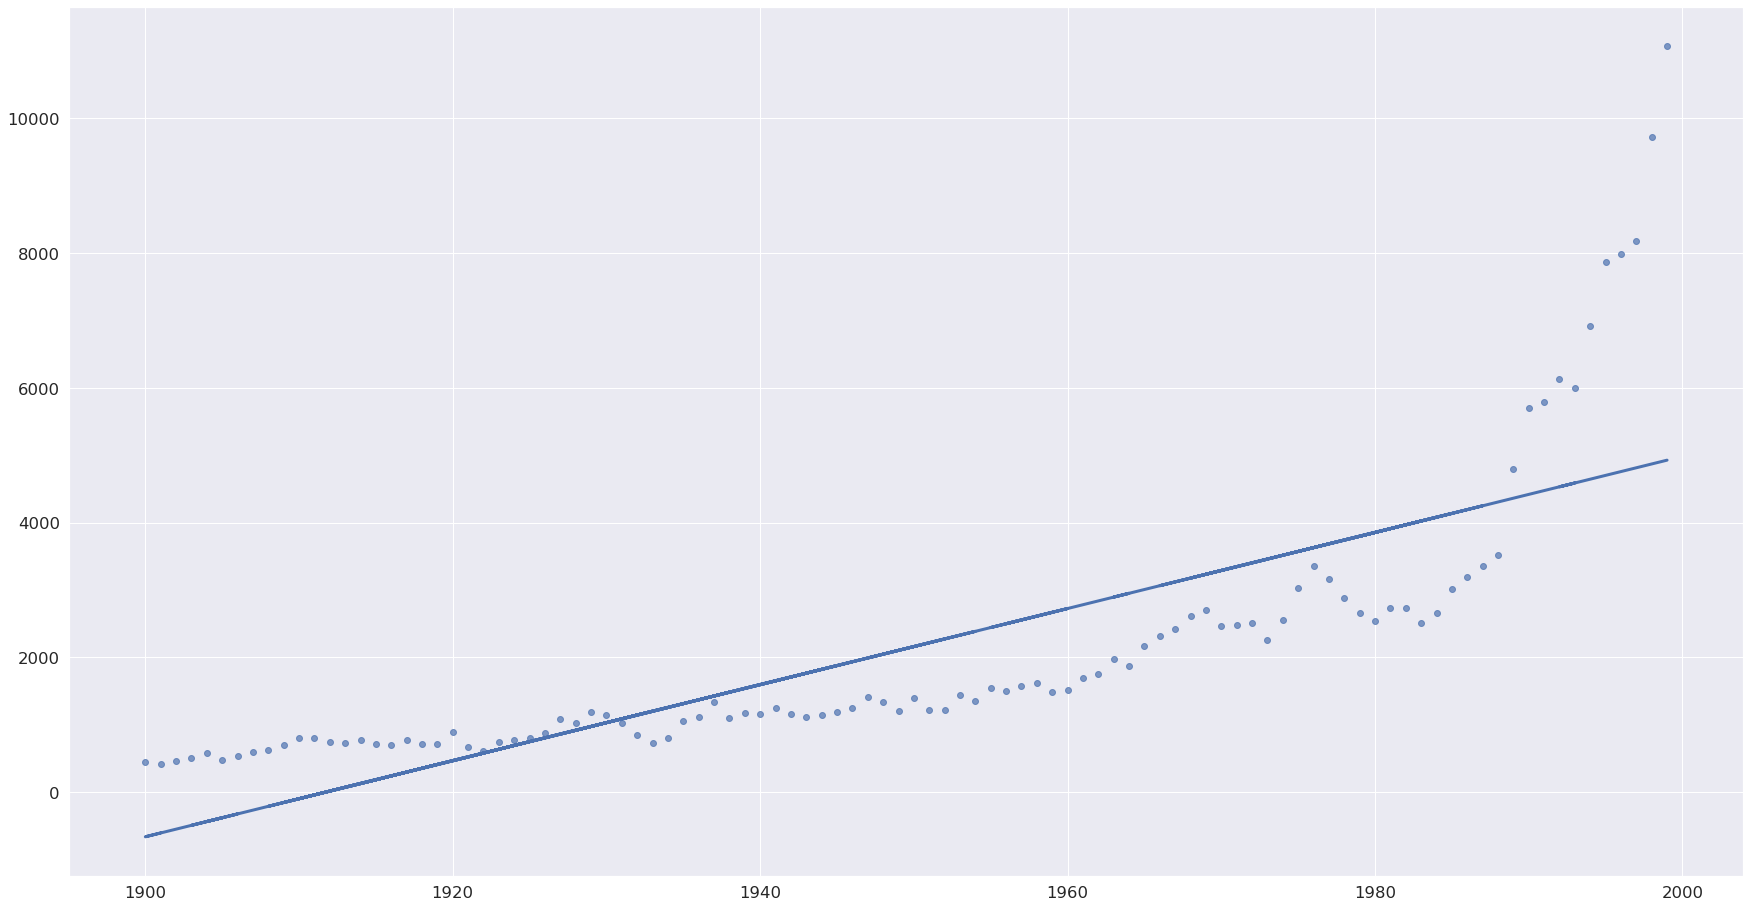

In [147]:
import statsmodels.api as sm
test_data = publications_by_year_1900_2000
X = sm.add_constant(publications_by_year_1900_2000['Year'])
model = sm.OLS(publications_by_year_1900_2000['Publications'], X)
results = model.fit()
plt.scatter(publications_by_year_1900_2000['Year'], publications_by_year_1900_2000['Publications'], alpha=0.7)
y_predict = results.params[0] + results.params[1]*publications_by_year_1900_2000['Year']
plt.plot(publications_by_year_1900_2000['Year'], y_predict, linewidth=3)

In [148]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
MSE = mean_squared_error(y_true = test_data.price.values, y_pred = lm.predict(test_X))
MSE
MSE**(0.5)

AttributeError: 'DataFrame' object has no attribute 'price'

In [149]:
elapsed = timeit.default_timer() - start_time
elapsed

126.3226635530591